#  Arabic newspaper topic modeling
## by:
<p><strong>Sohaib Albakri</strong></p>
         <b>Mashari Almuhanna</b>


## Problem 
> Our Problem is about arabic NLP and our task will be To prepare a dataset & classify each
document into a category.<br>
1.
Annotate the given dataset<br>
2.
Train your model<br>
3.
Predict the categories in test set
(in a new column)


## Solution

>In this project, we will develop an Arabic topic modeling to predict the correct topic of newspaper articles that can correctly classify the topic.

## Dataset 
> The dataset we will use contains Arabic newspaper articles. The following table explains the dataset in detail:
dataset in detail:

- ID | contains the ID of article
- Subject | contains breif describtion about the article. <br>

- Content | contains the text in the article.



## Data Gathring

In [19]:
import pandas as pd
import re
import string
import seaborn as sns
from pyarabic.araby import strip_harakat
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer 
import nltk 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
df_train = pd.read_csv("101121_news_source_HSEP_train.csv" )
df_test = pd.read_csv("101121_news_source_HSEP_test.csv" )
df = pd.concat([df_train, df_test], axis=0)

In [5]:
df.shape

(12225, 3)

In [6]:
df.head(10)

,ID,Subject,Content
0,0,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف,<p>متابعة – مظفر إسماعيل</p><p> </p><p>نفى “ل...
1,1,ماذا يفعل القرنفل على الريق؟,<p>خبرني - القرنفل على الريق هي ذات الفوائد ال...
2,2,لن تتوقعها.. حيلة ذكية تجعل ثمرة الأفوكادو تنض...,<p>متابعة – علي معلا:</p><p>يحب الجميع تناول ف...
3,3,السعودية تستضيف اليابان ضمن 6 مباريات فى تصفيا...,تقام اليوم الخميس، 6 مواجهات ضمن مباريات الجول...
4,4,انتهاء التصويت.. صناديق الاقتراع العام تغلق في...,أعلنت المفوضية العليا للانتخابات في العراق عن ...
5,5,إنريكى: مواجهة إسبانيا ضد إيطاليا صعبة وسنلعب ...,أكد لويس انريكي المدير الفني لمنتخب اسبانيا عل...
6,6,"تنسيقية شباب الأحزاب تعد تقريرا بعنوان"" أكتوبر...",أعدت تنسيقية شباب الأحزاب والسياسيين تقريرا تح...
7,7,خلال اجتماعها ..”المواد الغذائية” ترفع تقريرًا...,<p>رفعت شعبة المواد الغذائية بغرفة القاهرة تقر...
8,8,السعودية تعطل الكمبيوتر الياباني في تصفيات مون...,<p>خبرني - حقق المنتخب السعودي فوزا ثمينا على...
9,9,اكرم يسرى جناح نادى الزمالك يحصل على لقب هداف ...,<p>احتل لاعب نادى الزمالك اكرم يسرى صدارة هداف...


## Cleaning

In [7]:
arabic_punctuations = '''«»`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
punctuations_list

'«»`÷×؛<>_()*&^%][ـ،/:"؟.,\'{}~¦+|!”…“–ـ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def clean(text):
    output = re.sub(r'\s*[A-Za-z]+\b', ' ' , text) #Remove english letters
    output = strip_harakat(output) #Remove harakat   
    translator = str.maketrans(' ',' ', punctuations_list) #remove arabic and english punctuations
    output = output.translate(translator)
    output = " ".join(output.split()) #remove extra spaces
    output = re.sub('\w*\d\w*', ' ', output)# Remove numbers
    return output.strip()

In [9]:
df.Content = df.Content.map(clean)
df.Subject = df.Subject.map(clean)
df["Text"] = df.Subject + " " + df.Content
df.drop(columns=["ID"], inplace=True)

In [10]:
df.head()

,Subject,Content,Text
0,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف,متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسا...,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف ...
1,ماذا يفعل القرنفل على الريق,خبرني القرنفل على الريق هي ذات الفوائد التي يج...,ماذا يفعل القرنفل على الريق خبرني القرنفل على ...
2,لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج ...,متابعة علي معلا يحب الجميع تناول فاكهة الأفوكا...,لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج ...
3,السعودية تستضيف اليابان ضمن مباريات فى تصفيا...,تقام اليوم الخميس مواجهات ضمن مباريات الجولة...,السعودية تستضيف اليابان ضمن مباريات فى تصفيا...
4,انتهاء التصويت صناديق الاقتراع العام تغلق في ع...,أعلنت المفوضية العليا للانتخابات في العراق عن ...,انتهاء التصويت صناديق الاقتراع العام تغلق في ع...


## Save clean data

In [11]:
df.to_csv("clean_data.csv")

## Arabic Stopwords

In [12]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

## K_mean

In [14]:
documents = df.Text.copy()

vectorizer = TfidfVectorizer(stop_words=arb_stopwords)
X = vectorizer.fit_transform(documents)

true_k = 5
# model = KMeans(n_clusters=true_k, init='k-means++',random_state=60, max_iter=100, n_init=1)
model = KMeans(n_clusters=true_k, init='k-means++',random_state=60, max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Top terms per cluster:
Cluster 0:
 لقاح
 جرعة
 كورونا
 اللقاح
 فايزر
 الجرعة
 الصحة
 التطعيم
 فيروس
 الجرعات
Cluster 1:
 حالة
 كورونا
 إصابة
 الصحة
 جديدة
 وفاة
 يمكن
 تسجيل
 بفيروس
 الدم
Cluster 2:
 سعر
 خلال
 للشراء
 للبيع
 المملكة
 رئيس
 مجلس
 بن
 العام
 المتحدة
Cluster 3:
 الدوري
 فى
 منتخب
 الفريق
 المباراة
 مباراة
 صلاح
 محمد
 الزمالك
 المنتخب
Cluster 4:
 الذهب
 سعر
 عيار
 أسعار
 جرام
 الدولار
 دينارا
 تعاملات
 سجل
 وسجل


### Results
> We can notice that topics are:
>> Cluster 0: Health<br>
>> Cluster 1: Health<br>
>> Cluster 2: Politics<br>
>> Cluster 3: Sports<br>
>> Cluster 4: Economy And Finance

In [15]:
prediction = model.predict(X)
print(prediction)

[3 1 1 ... 0 4 1]


In [16]:
df["Topic_AR"] = prediction
df.Topic_AR.replace({0: "صحة", 1:"صحة", 2:"سياسة", 3:"رياضة", 4:"إقتصاد" }, inplace=True)

df["Topic_EN"] = prediction
df.Topic_EN.replace({0: "Health", 1:"Health", 2:"Politics", 3:"Sports", 4:"Eco" }, inplace=True)

In [17]:
df.head(30)

,Subject,Content,Text,Topic_AR,Topic_EN
0,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف,متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسا...,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف ...,رياضة,Sports
1,ماذا يفعل القرنفل على الريق,خبرني القرنفل على الريق هي ذات الفوائد التي يج...,ماذا يفعل القرنفل على الريق خبرني القرنفل على ...,صحة,Health
2,لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج ...,متابعة علي معلا يحب الجميع تناول فاكهة الأفوكا...,لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج ...,صحة,Health
3,السعودية تستضيف اليابان ضمن مباريات فى تصفيا...,تقام اليوم الخميس مواجهات ضمن مباريات الجولة...,السعودية تستضيف اليابان ضمن مباريات فى تصفيا...,رياضة,Sports
4,انتهاء التصويت صناديق الاقتراع العام تغلق في ع...,أعلنت المفوضية العليا للانتخابات في العراق عن ...,انتهاء التصويت صناديق الاقتراع العام تغلق في ع...,سياسة,Politics
5,إنريكى مواجهة إسبانيا ضد إيطاليا صعبة وسنلعب ب...,أكد لويس انريكي المدير الفني لمنتخب اسبانيا عل...,إنريكى مواجهة إسبانيا ضد إيطاليا صعبة وسنلعب ب...,رياضة,Sports
6,تنسيقية شباب الأحزاب تعد تقريرا بعنوان أكتوبر ...,أعدت تنسيقية شباب الأحزاب والسياسيين تقريرا تح...,تنسيقية شباب الأحزاب تعد تقريرا بعنوان أكتوبر ...,سياسة,Politics
7,خلال اجتماعها المواد الغذائية ترفع تقريرا لالع...,رفعت شعبة المواد الغذائية بغرفة القاهرة تقريرا...,خلال اجتماعها المواد الغذائية ترفع تقريرا لالع...,سياسة,Politics
8,السعودية تعطل الكمبيوتر الياباني في تصفيات مون...,خبرني حقق المنتخب السعودي فوزا ثمينا على نظيره...,السعودية تعطل الكمبيوتر الياباني في تصفيات مون...,رياضة,Sports
9,اكرم يسرى جناح نادى الزمالك يحصل على لقب هداف ...,احتل لاعب نادى الزمالك اكرم يسرى صدارة هدافين ...,اكرم يسرى جناح نادى الزمالك يحصل على لقب هداف ...,رياضة,Sports


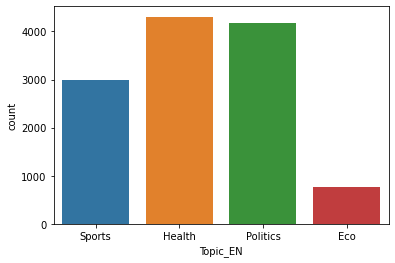

In [23]:
sns.countplot(data=df,x='Topic_EN');

# Save the model

In [17]:
filename = "model1.sav"
pickle.dump(model, open(filename,"wb"))

# LSA

In [18]:
vectorizer = TfidfVectorizer(stop_words=arb_stopwords, ngram_range=(1,2))
doc_word = vectorizer.fit_transform(documents)
doc_word.shape

D:\Program files\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(12225, 861866)

In [19]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(doc_word)
# the percentage of variance that is attributed by each of the selected components/topics
lsa.explained_variance_ratio_

array([0.01531928, 0.0073848 , 0.00775827, 0.00247807])

In [20]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [21]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
الذهب, سعر, عيار, الذهب عيار, أسعار, جرام الذهب, جرام, سعر جرام, أسعار الذهب, الدولار

Topic  1
حالة, كورونا, جديدة, الصحة, إصابة, تسجيل, وفاة, إجمالي, عدد, إصابة جديدة

Topic  2
للشراء, للبيع, للشراء للبيع, سعر, المركزي, متوسط سعر, بنك, الدينار, متوسط, الموازية

Topic  3
فى, محمد, صلاح, الدوري, منتخب, جرعة, مباراة, المباراة, خلال, الفريق


In [22]:
Vt = pd.DataFrame(doc_topic.round(3),
             index = documents,
             columns = ["component_1","component_2","component_3","component_4" ])

Vt.head(5)

,component_1,component_2,component_3,component_4
Text,,,,
سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسال رسالة إلى رونالد كومان خلال لقاء أتلتيكو مدريد وضيفه برشلونة في الدوري الإسباني السبت وبعدما سجل سواريز هدف أتلتيكو الثاني أشار المهاجم المخضرم بيده وكأنه يمسك هاتفا ويتحدث إلى شخص ما وهو ما ربطه المتابعون بمكالمة كومان إلى سواريز في صيف التي أبلغه خلالها بأنه خرج من خططه وأن عليه الرحيل عن برشلونة والبحث عن فريق آخر وقال سواريز بعد اللقاء الذي ابتسم لأصحاب الأرض إن الرسالة التي أراد توجيهها لم تكن لكومان على الإطلاق وتابع بلهجة غامضة في تصريحات نشرتها صحيفة ماركا الرياضية الإسبانية كان ذلك للأشخاص الذين يعرفون أن لدي نفس الرقم وأنني ما زلت أستخدم نفس الهاتف إن كنت تريد أن تعرف كنت أمزح مع أطفالي أنني سأفعل ذلك كما علق سواريز على عدم احتفاله بإحراز هدف في شباك فريقه السابق موضحا كنت أعرف بالفعل أنني إذا سجلت فسأعتذر وأضاف لم أحتفل احتراما وتعاطفا لكوني من مشجعي برشلونة ولمسيرتي في برشلونة وللفترة التي يمر بها زملائي السابقون وهي صعبة ولجماهير برشلونة احترمت ذلك,0.007,0.012,0.002,0.061
ماذا يفعل القرنفل على الريق خبرني القرنفل على الريق هي ذات الفوائد التي يجنيها الإنسان من خلال استخدامه للقرنفل في أي وقت وتتمثل فوائد القرنفل على الريق المحتملة في ما يأتي يخفض من خطر الإلتهابات فيساعد استخدام القرنفل في خفض خطر الإصابة بالالتهابات كما يتمتع بخصائص مضادة للأكسدة فإن القرنفل يحتوي على العديد من المواد والتي لها دور كمضادات للأكسدة وهذا يعني أنها تعمل على التقليل من مشكلة الإجهاد التأكسدي الناتجة عن تراكم الجذور الحرة في الجسم ويقلل من مشكلة تقرحات المعدة كما يزيد من عمل وكفاءة الكبد حيث تعمل المواد الموجودة فيه وخاصة مادة اليوجينول على التقليل من علامات الإصابة بالكبد الدهني وتشمع الكبد كما أنها تساعد في تحسين وظائف الكبد بشكل عام إضافة إلى أنه يحسن صحة الفم والأسنان ويقوي صحة الجهاز الهضمي إلى جانب دور القرنفل في التقليل من مشكلة تقرحات المعدة فإنه يعمل على تقوية صحة الجهاز الهضمي بشكل عام,0.004,0.015,0.001,0.047
لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج خلال وقت قياسي متابعة علي معلا يحب الجميع تناول فاكهة الأفوكادو ذات المذاق الفريد والغنية بالمكونات الأساسية التي يحتاج إليها الجسم وعادة ما تتوفر في المتاجر غير ناضجة ولهذا من المفيد جدا تعلم طريقة تساعد على إنضاجها بسرعة في المنزل ومن أجل هذا يمكن اللجوء إلى حيلة الموز وفي هذه الحالة يجب وضع الحبة تحت بضع حبات من الموز لمدة أيام فهذه الثمار تصدر غاز الإيثيلين الذي يعمل على إنضاج الفواكه ويمكن ايضا تغليف حبات الأفوكادو بالورق لمدة أيام قليلة ومن الحيل المفيدة في هذا السياق أيضا أن يتم استخدام أعواد تنظيف الأسنان فهي عملية جدا ومفيدة ولهذا يجب غرز عود في ثمرة الأفوكادو من كل جانب وتركها حتى اليوم التالي حيث سيلاحظ أنها بدأت تنضج فعلا ويشار إلى أنه يمكن تناولها طازجة من دون المبالغة في ذلك كما يمكن إضافة شرحاتها إلى مختلف أنواع السلطات ومن المفيد الاعتماد عليها لتحضير طبق تحلية صحي وسريع وفي هذه الحالة ننصحك مثلا بإضافة القليل من العسل إلى قطع الأفوكادو,0.005,0.016,0.002,0.040
السعودية تستضيف اليابان ضمن مباريات فى تصفيات آسيا المؤهلة لكأس العالم تقام اليوم الخميس مواجهات ضمن مباريات الجولة الثالثة من تصفيات آسيا المؤهلة لكأس العالم قطر حيث يسضيف منتخب السعودية نظيره اليابانى فى قمة لقاءت الجولة الاسيوية ويحتضن ستاد مدينة الملك عبد الله الرياضية بجدة مباراة المنتخب السعودي ضد اليابان في الجولة الثالثة من الدور الثالث من تصفيات كأس العالم آسيا فى تمام الساعة السابعة مساء بتوقبت القاهرة ويحتل منتخب السعودية المركز الثاني في جدول ترتيب المجموعة برصيد نقاط وبفارق الأهداف فقط عن أستراليا صاحب الصدارة بعدما فاز الأخضر بمباراتيه السابقتين على فيتنام وعمان على التوالي فيما تعرض المنتخب الياباني لخسارة مفاجئة في المباراة الأولى من المنتخب العماني لكنه فاز على الصين في المباراة الثانية ليحتل المركز الرابع برصيد نقاط ويطمح الأخضر السعودي في الفوز بنتيجة المباراة لحصد احد المراكز المؤهلة لكاس العالم وتكرار انجاز التأهل الي مونديال روسيا بعد ان تفوق علي اليابان بهدف فهد المولد فيما يدخل منتخب اليابان المواجهة وليس لديه أي خيار غير الفوز في المباراة لمواصلة المنافسة علي الصدارة والتأهل الي مونديال قطر ومن المتوقع أن يبدأ منتخب السعودية المباراة بتشكيل مكون من حراسة المرمي محمد العويس الدفاع سلطان الغنام عبد الاله العمري عبد الله مادو ياسر ا

### Result 
> From the list of words and the dataframe above for each component we could notice that there is no sense on the results it gave us for health, sports and politics on the same component

# NMF

In [23]:
nmf_model = NMF(4)
doc_topic1 = nmf_model.fit_transform(doc_word)

D:\Program files\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [24]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
الذهب, عيار, سعر, الذهب عيار, جرام الذهب, جرام, أسعار, سعر جرام, أسعار الذهب, تعاملات

Topic  1
حالة, كورونا, جديدة, إصابة, الصحة, تسجيل, وفاة, إجمالي, إصابة جديدة, عدد

Topic  2
سعر, للشراء, للبيع, للشراء للبيع, المركزي, الدولار, متوسط سعر, الدينار, بنك, متوسط

Topic  3
فى, محمد, صلاح, الدوري, منتخب, خلال, مباراة, المباراة, العالم, الفريق


In [26]:
H = pd.DataFrame(doc_topic1.round(5),
             index = documents,
             columns = ["component_1","component_2","component_3","component_4" ])
H.head(5)

,component_1,component_2,component_3,component_4
Text,,,,
سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسال رسالة إلى رونالد كومان خلال لقاء أتلتيكو مدريد وضيفه برشلونة في الدوري الإسباني السبت وبعدما سجل سواريز هدف أتلتيكو الثاني أشار المهاجم المخضرم بيده وكأنه يمسك هاتفا ويتحدث إلى شخص ما وهو ما ربطه المتابعون بمكالمة كومان إلى سواريز في صيف التي أبلغه خلالها بأنه خرج من خططه وأن عليه الرحيل عن برشلونة والبحث عن فريق آخر وقال سواريز بعد اللقاء الذي ابتسم لأصحاب الأرض إن الرسالة التي أراد توجيهها لم تكن لكومان على الإطلاق وتابع بلهجة غامضة في تصريحات نشرتها صحيفة ماركا الرياضية الإسبانية كان ذلك للأشخاص الذين يعرفون أن لدي نفس الرقم وأنني ما زلت أستخدم نفس الهاتف إن كنت تريد أن تعرف كنت أمزح مع أطفالي أنني سأفعل ذلك كما علق سواريز على عدم احتفاله بإحراز هدف في شباك فريقه السابق موضحا كنت أعرف بالفعل أنني إذا سجلت فسأعتذر وأضاف لم أحتفل احتراما وتعاطفا لكوني من مشجعي برشلونة ولمسيرتي في برشلونة وللفترة التي يمر بها زملائي السابقون وهي صعبة ولجماهير برشلونة احترمت ذلك,0.00000,0.00000,0.00000,0.02432
ماذا يفعل القرنفل على الريق خبرني القرنفل على الريق هي ذات الفوائد التي يجنيها الإنسان من خلال استخدامه للقرنفل في أي وقت وتتمثل فوائد القرنفل على الريق المحتملة في ما يأتي يخفض من خطر الإلتهابات فيساعد استخدام القرنفل في خفض خطر الإصابة بالالتهابات كما يتمتع بخصائص مضادة للأكسدة فإن القرنفل يحتوي على العديد من المواد والتي لها دور كمضادات للأكسدة وهذا يعني أنها تعمل على التقليل من مشكلة الإجهاد التأكسدي الناتجة عن تراكم الجذور الحرة في الجسم ويقلل من مشكلة تقرحات المعدة كما يزيد من عمل وكفاءة الكبد حيث تعمل المواد الموجودة فيه وخاصة مادة اليوجينول على التقليل من علامات الإصابة بالكبد الدهني وتشمع الكبد كما أنها تساعد في تحسين وظائف الكبد بشكل عام إضافة إلى أنه يحسن صحة الفم والأسنان ويقوي صحة الجهاز الهضمي إلى جانب دور القرنفل في التقليل من مشكلة تقرحات المعدة فإنه يعمل على تقوية صحة الجهاز الهضمي بشكل عام,0.00000,0.00000,0.00000,0.01831
لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج خلال وقت قياسي متابعة علي معلا يحب الجميع تناول فاكهة الأفوكادو ذات المذاق الفريد والغنية بالمكونات الأساسية التي يحتاج إليها الجسم وعادة ما تتوفر في المتاجر غير ناضجة ولهذا من المفيد جدا تعلم طريقة تساعد على إنضاجها بسرعة في المنزل ومن أجل هذا يمكن اللجوء إلى حيلة الموز وفي هذه الحالة يجب وضع الحبة تحت بضع حبات من الموز لمدة أيام فهذه الثمار تصدر غاز الإيثيلين الذي يعمل على إنضاج الفواكه ويمكن ايضا تغليف حبات الأفوكادو بالورق لمدة أيام قليلة ومن الحيل المفيدة في هذا السياق أيضا أن يتم استخدام أعواد تنظيف الأسنان فهي عملية جدا ومفيدة ولهذا يجب غرز عود في ثمرة الأفوكادو من كل جانب وتركها حتى اليوم التالي حيث سيلاحظ أنها بدأت تنضج فعلا ويشار إلى أنه يمكن تناولها طازجة من دون المبالغة في ذلك كما يمكن إضافة شرحاتها إلى مختلف أنواع السلطات ومن المفيد الاعتماد عليها لتحضير طبق تحلية صحي وسريع وفي هذه الحالة ننصحك مثلا بإضافة القليل من العسل إلى قطع الأفوكادو,0.00000,0.00093,0.00000,0.01590
السعودية تستضيف اليابان ضمن مباريات فى تصفيات آسيا المؤهلة لكأس العالم تقام اليوم الخميس مواجهات ضمن مباريات الجولة الثالثة من تصفيات آسيا المؤهلة لكأس العالم قطر حيث يسضيف منتخب السعودية نظيره اليابانى فى قمة لقاءت الجولة الاسيوية ويحتضن ستاد مدينة الملك عبد الله الرياضية بجدة مباراة المنتخب السعودي ضد اليابان في الجولة الثالثة من الدور الثالث من تصفيات كأس العالم آسيا فى تمام الساعة السابعة مساء بتوقبت القاهرة ويحتل منتخب السعودية المركز الثاني في جدول ترتيب المجموعة برصيد نقاط وبفارق الأهداف فقط عن أستراليا صاحب الصدارة بعدما فاز الأخضر بمباراتيه السابقتين على فيتنام وعمان على التوالي فيما تعرض المنتخب الياباني لخسارة مفاجئة في المباراة الأولى من المنتخب العماني لكنه فاز على الصين في المباراة الثانية ليحتل المركز الرابع برصيد نقاط ويطمح الأخضر السعودي في الفوز بنتيجة المباراة لحصد احد المراكز المؤهلة لكاس العالم وتكرار انجاز التأهل الي مونديال روسيا بعد ان تفوق علي اليابان بهدف فهد المولد فيما يدخل منتخب اليابان المواجهة وليس لديه أي خيار غير الفوز في المباراة لمواصلة المنافسة علي الصدارة والتأهل الي مونديال قطر ومن المتوقع أن يبدأ منتخب السعودية المباراة بتشكيل مكون من حراسة المرمي محمد العويس الدفاع سلطان الغنام عبد الاله الع

### Result 
> From the list of words and the dataframe above for each component we could notice that there is no sense on the results it gave us for health, sports and politics on the same component

## Conclusion 
> At the beginning we clean our data and after that We tried three diffrent approches to topic modeling but the only  model with good results was Kmeans so we will choose this model. From this project we were hoping to have good results with arabic data since there are only a few resources for arabic NLP.